# SVR

## Importing libraries


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [59]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,2:].values
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


## Feature scaling 

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()#computes mean and sd for x only
X=sc.fit_transform(X)#scaling x
sc2=StandardScaler()#computes mean and sd for y as sc aldready calculated mean and sd of x we cant use that to compute scaling of y as mean and sd of x and y varies
y=sc2.fit_transform(y)

## Training the SVR model

In [63]:
from sklearn.svm import SVR
regressor=SVR(kernel = 'rbf' )
regressor.fit(X,y.ravel())

SVR()

## Prediction

In [55]:
sc2.inverse_transform(regressor.predict(sc.transform([[6.5 ]])))

array([170370.0204065])

## Plotting 

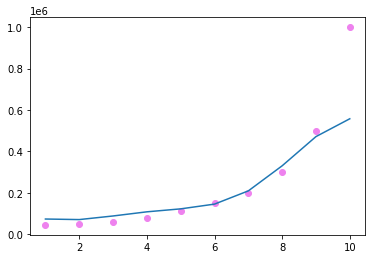

In [79]:
plt.scatter(sc.inverse_transform(X),sc2.inverse_transform(y),color='violet')
plt.plot(sc.inverse_transform(X),sc2.inverse_transform(regressor.predict((X))))

### Refined Plotting (smoother curve)

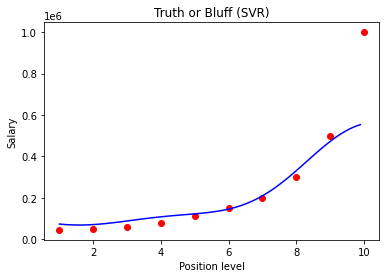

In [81]:
X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc2.inverse_transform(regressor.predict(sc.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()